#              Case Study on Correlation and Regression

####   *A textile company regularly spent money on five advertising companies for their ads.*
####   *1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.*
####   *2. Build a regression model to predict the profit from the given data and comment your findings on it.*
####   *3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.*

   ####                      Add1(in Thousands) - 290
   ####                      Add2(in Thousands) - 312
   ####                      Add3(in Thousands) - 309
   ####                      Add4(in Thousands) - 298
   ####                      Add5(in Thousands) - 320


#### Reading and Understanding Data

In [1]:
import pandas as pd                      # Importing packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales = pd.read_csv('Add_sales_data_2018.csv')    # Reading given csv file in python environment 
sales.head()                                             # Displaying columns and rows

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
sales.shape                  # Displaying no.of rows and columns

(205, 7)

In [4]:
sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [5]:
sales.describe()             # Displaying statistical datas from the dataset

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


##### Data cleaning

In [6]:
sales.isna().sum()            # Checking for null values

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
sales.columns        #Displaying names of columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

### 1.  Check whether there is any relationship between the amount spent for advertising through five different                    companies and profit generated.


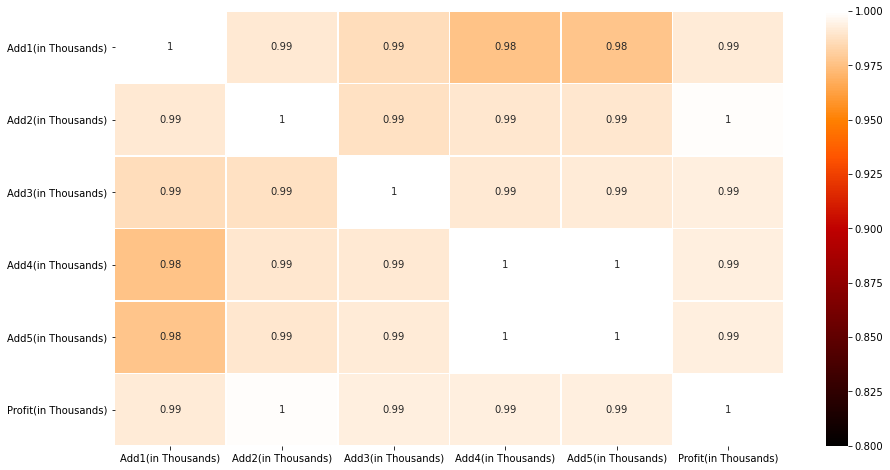

In [8]:
corrmatrix = sales.corr()        # Checking correlation between numerical variables.  
plt.subplots(figsize=(15,8))
sns.heatmap(corrmatrix,vmin=0.8,vmax=1,annot=True, linewidths=0.6,cmap='gist_heat') 
plt.show()                                                                                       #heat map

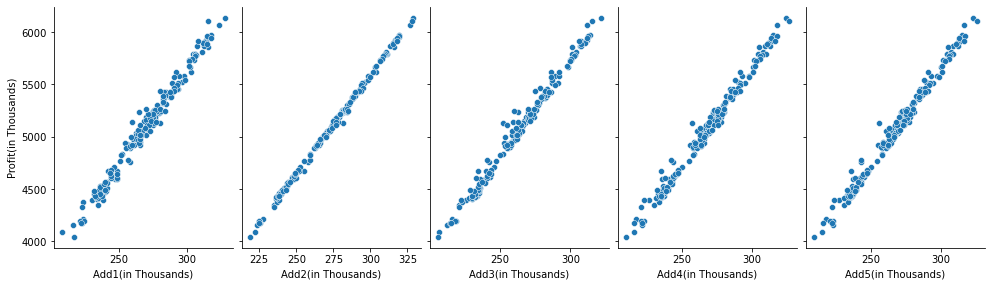

In [9]:
# checking how other variables related to profit using scatter plot.
sns.pairplot(sales, x_vars=['Add1(in Thousands)', 'Add2(in Thousands)','Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)'], y_vars='Profit(in Thousands)', height=4, aspect=0.7, kind='scatter')
plt.show()

In [10]:
x1 = sales[['Add1(in Thousands)', 'Add2(in Thousands)','Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)','Profit(in Thousands)']]
corr1 = x1.corr()
corr1

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

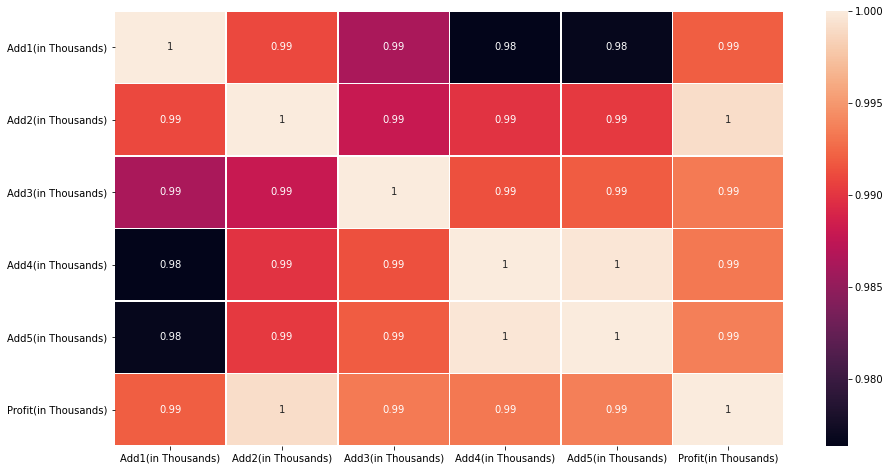

In [11]:
# checking correlation between different variables using heatmap.
corrmatrix = sales.corr()         
plt.subplots(figsize=(15,8))
sns.heatmap(corr1,xticklabels=corr1.columns.values, yticklabels=corr1.columns.values,linewidths=0.6,annot=True)

### 2. Build a regression model to predict the profit from the given data and comment your findings on it.

#### model-1

In [12]:
#Here,y is the dependent and x is independent variable.
y1 = sales['Profit(in Thousands)']
x1 = sales.drop(['Date','Profit(in Thousands)'],axis=1)          #Dropping date column from dataset 

In [13]:
x1.shape

(205, 5)

In [14]:
from sklearn.model_selection import train_test_split           # splitting x1 and y1 as test and train
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state=42,test_size=0.3) 

In [15]:
from sklearn import linear_model

In [16]:
lr = linear_model.LinearRegression()

In [17]:
model1 = lr.fit(x1_train,y1_train)                                # train model

In [18]:
predictions1 = model1.predict(x1_test)

In [19]:
print(y1_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [20]:
print(predictions1)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457 4887.296 5805.521 4705.198 4404.686
 5465.277 4947.72  5185.639 5225.14  5111.806 5518.561]


In [21]:
from sklearn.metrics import mean_squared_error    
from sklearn.metrics import r2_score               # for calculating efficiency of our model.

In [22]:
print('MSE is:',mean_squared_error(y1_test,predictions1))
print('Rounded MSE value is %0.2f'%mean_squared_error(y1_test,predictions1))
rsquare=r2_score(y1_test,predictions1)
print('R^2 value :',r2_score(y1_test,predictions1))
print('Rounded R^2 value : %0.2f'%r2_score(y1_test,predictions1))

MSE is: 3.602238151440604e-24
Rounded MSE value is 0.00
R^2 value : 1.0
Rounded R^2 value : 1.00


In [23]:
model1.intercept_

-2.7284841053187847e-12

In [24]:
model1.coef_

array([ 1.  , 12.38,  3.5 ,  1.  ,  0.9 ])

### model-2

In [25]:
y2 = sales['Profit(in Thousands)']      
x2 = sales.drop(['Date','Add4(in Thousands)','Profit(in Thousands)'],axis=1)    #dropping Add4 from data since add4 and add5 have same r-value. 

In [26]:
x2.shape

(205, 4)

In [27]:
from sklearn.model_selection import train_test_split           # splitting x2 and y2 as test and train
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,random_state=42,test_size=0.3) 

In [28]:
from sklearn import linear_model

In [29]:
lr = linear_model.LinearRegression()

In [30]:
model2 = lr.fit(x2_train,y2_train)                                # train model

In [31]:
predictions2 = model2.predict(x2_test)

In [32]:
print(y2_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [33]:
print(predictions2)

[4153.30091524 4445.74485363 5130.31194344 4906.5009831  5006.82934283
 4623.37871824 5384.56149117 5328.07803304 5174.24370881 5956.14830808
 5780.66051003 4998.60686728 5075.71218324 5783.13592675 4936.48735343
 5065.32654192 4190.90822424 5034.92030714 5013.69957154 5134.44877437
 5145.26691471 5422.49858516 4569.04723267 4597.9226097  4436.7387539
 4175.23409335 5616.11646597 5667.24974521 4648.97050236 5717.82392801
 5000.54486283 5182.27591418 5017.71317871 5545.20253607 5013.75747885
 5033.30164598 5108.64288164 4759.98920364 4604.90448421 4925.61029966
 5252.34316365 5038.54349109 5491.86215827 5019.17052684 4646.98853478
 4486.41434186 4434.02038896 5300.4920799  5425.32088813 4482.16126062
 4193.26732877 6061.1359857  4887.39337726 5805.06748707 4705.51916387
 4405.05545724 5464.1374467  4948.27789204 5185.21794653 5224.97864052
 5112.25581083 5518.72858015]


In [34]:
from sklearn.metrics import mean_squared_error   
from sklearn.metrics import r2_score                   # for calculating efficiency of our model.

In [35]:
print('MSE is:',mean_squared_error(y2_test,predictions2))
print('Rounded MSE value is %0.2f'%mean_squared_error(y2_test,predictions2))         #mean square error

rsquare=r2_score(y2_test,predictions2)
print('R^2 value :',r2_score(y2_test,predictions2))
print('Rounded R^2 value : %0.2f'%r2_score(y2_test,predictions2))

MSE is: 0.6864051605651609
Rounded MSE value is 0.69
R^2 value : 0.9999966761540983
Rounded R^2 value : 1.00


In [36]:
model2.intercept_

0.24800071211302566

In [37]:
model2.coef_

array([ 1.00164933, 12.35244975,  3.48618866,  1.93920976])

### model-3

In [38]:
y3 = sales['Profit(in Thousands)']      
x3 = sales.drop(['Date','Add5(in Thousands)','Profit(in Thousands)'],axis=1)    #since add4 and add5 have same r-value, add5 is dropped here. 

In [39]:
x3.shape

(205, 4)

In [40]:
from sklearn.model_selection import train_test_split           # splitting x3 and y3 as test and train
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,random_state=42,test_size=0.3) 

In [41]:
from sklearn import linear_model

In [42]:
lr = linear_model.LinearRegression()

In [43]:
model3 = lr.fit(x3_train,y3_train)   

In [44]:
predictions3 = model3.predict(x3_test)

In [45]:
print(y3_test)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64


In [46]:
print(predictions3)

[4150.86786185 4447.10245069 5133.45383151 4908.26985367 5002.13240271
 4624.16361406 5383.92552398 5328.01037622 5175.58953463 5956.57229017
 5780.90251952 4996.84813668 5076.08267221 5785.55926725 4935.74081161
 5065.83898649 4190.93885419 5034.51404109 5016.95625304 5134.85143335
 5144.92568158 5421.54271302 4569.52434524 4598.6024762  4436.00559162
 4176.15660722 5617.39360986 5667.22460143 4648.68110832 5717.91100883
 5002.56448613 5182.39777643 5017.27807559 5544.95793674 5012.7085219
 5028.09438974 5108.59938567 4761.74698243 4607.58009427 4925.97551572
 5249.67746638 5037.89791133 5491.69395859 5020.81382275 4647.64794962
 4486.39897443 4436.01290101 5300.50815413 5425.05673571 4482.16128263
 4192.88982658 6063.6222896  4887.18536369 5805.82740591 4704.91211617
 4404.29646708 5466.08723907 4947.30029627 5185.93095645 5225.39369154
 5111.23585585 5518.4224733 ]


In [47]:
from sklearn.metrics import mean_squared_error   
from sklearn.metrics import r2_score                   # for calculating efficiency of our model.

In [48]:
print('MSE is:',mean_squared_error(y3_test,predictions3))
print('Rounded MSE value is %0.2f'%mean_squared_error(y3_test,predictions3))         #mean square error

rsquare=r2_score(y2_test,predictions3)
print('R^2 value :',r2_score(y3_test,predictions3))
print('Rounded R^2 value : %0.2f'%r2_score(y3_test,predictions3))

MSE is: 0.4861368663196591
Rounded MSE value is 0.49
R^2 value : 0.9999976459325721
Rounded R^2 value : 1.00


In [49]:
model3.intercept_

-0.3573976977950224

In [50]:
model3.coef_

array([ 0.97531309, 12.44135961,  3.54271552,  1.82145578])

### 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

#####    Add1(in Thousands) 290¶
#####    Add2(in Thousands) 312
#####    Add3(in Thousands) 309
#####    Add4(in Thousands) 298
#####    Add5(in Thousands) 320

In [52]:
# prediction for model1 (dropping date and maintaining other features)
make_prediction = [[290,312,309,298,320]]
print('Predicted profit is:',(model1.predict(make_prediction).item()))
print('Rounded value of predicted profit is:%0.2f'%(model1.predict(make_prediction).item()))

Predicted profit is: 5820.0599999999995
Rounded value of predicted profit is:5820.06


In [53]:
# prediction for model2(dropping add4)
make_prediction2 = [[290,312,309,320]]
print('Predicted profit is:',(model2.predict(make_prediction2).item()))
print('Rounded value of predicted profit is:%0.2f'%(model2.predict(make_prediction2).item()))

Predicted profit is: 5842.470049365756
Rounded value of predicted profit is:5842.47


In [54]:
# prediction for model3(dropping add5)
make_prediction3 = [[290,312,309,298]]
print('Predicted profit is:',(model3.predict(make_prediction3).item()))
print('Rounded value of predicted profit is:%0.2f'%(model3.predict(make_prediction3).item()))

Predicted profit is: 5801.68051325114
Rounded value of predicted profit is:5801.68
